# Data Science Project - Bitcoin Market Sentiment Analysis

Welcome to the main data science analysis notebook! This notebook contains the complete workflow for our data science project.

## Project Structure
```
ds_Lucky_Sharma/
├── notebook_1.ipynb     # Main analysis notebook (this file)
├── notebook_2.ipynb     # Additional analysis (optional)
├── csv_files/           # Data storage directory
├── outputs/             # Visualization outputs and results
└── README.md           # Project documentation
```

---

# Import Liberaries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load And Explore Data

Based on your Bitcoin Market Sentiment dataset and the objective to explore trading behavior vs market sentiment, here are the key analyses you can perform:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/itsluckysharma01/ds_Lucky_Sharma/refs/heads/main/csv_files/fear_greed_index.csv')

In [3]:
df.head()  # Display the first few rows of the dataset

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [5]:
df.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [6]:
df.shape #Rows and columns

(2644, 4)

## Check for null values

In [7]:
df.isnull().sum() #Check for null values

timestamp         0
value             0
classification    0
date              0
dtype: int64

### Data is clean and ready for analysis

# Check for duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

### Data is clean and ready for analysis


# Visulization of Data

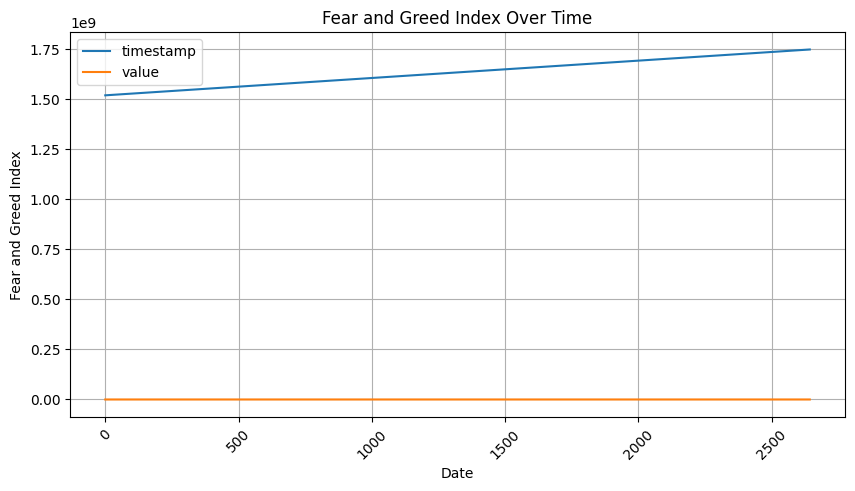

In [9]:
df.plot(figsize=(10, 5), title='Fear and Greed Index Over Time')
plt.xlabel('Date')
plt.ylabel('Fear and Greed Index')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [10]:
df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


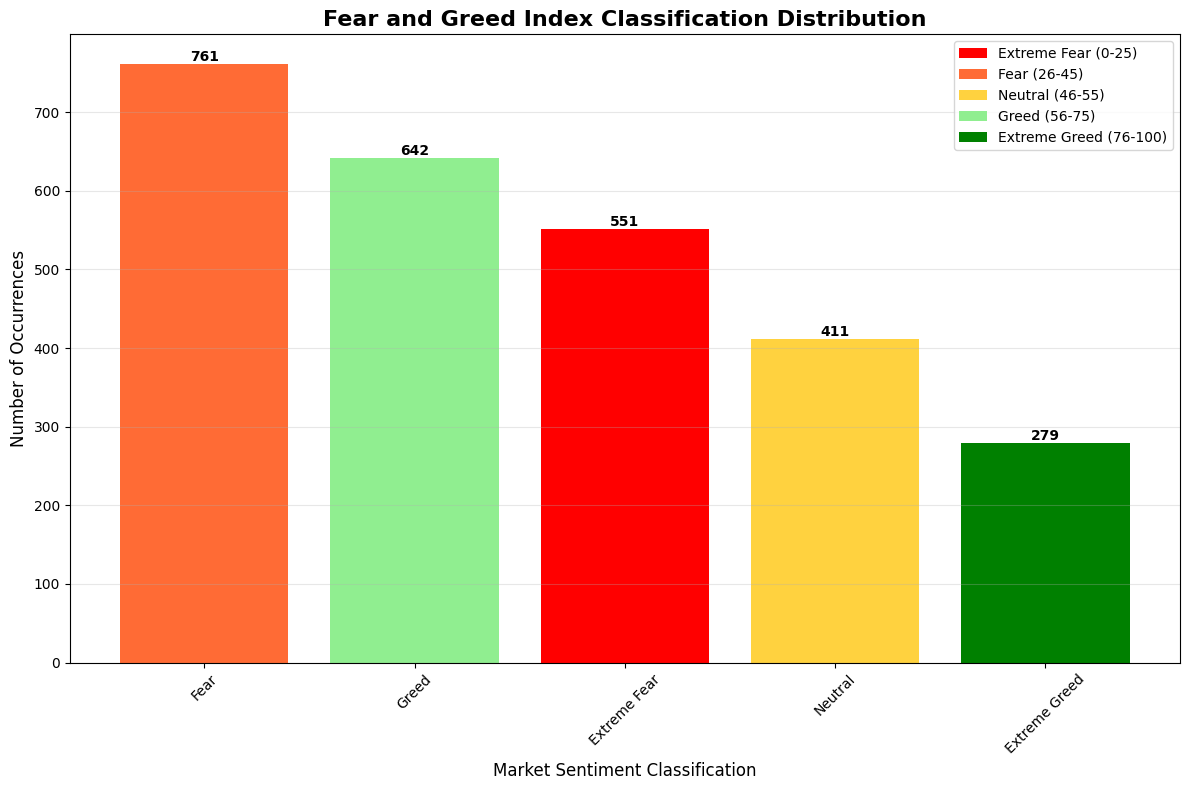

Fear and Greed Index Classification Summary:
---------------------------------------------
Extreme Fear   :  551 occurrences ( 20.8%)
Fear           :  761 occurrences ( 28.8%)
Neutral        :  411 occurrences ( 15.5%)
Greed          :  642 occurrences ( 24.3%)
Extreme Greed  :  279 occurrences ( 10.6%)

Total data points: 2644


In [ ]:
# Create Fear and Greed Index classification ranges
def classify_fear_greed(value):
    if value <= 25:
        return 'Extreme Fear'
    elif value <= 45:
        return 'Fear'
    elif value <= 55:
        return 'Neutral'
    elif value <= 75:
        return 'Greed'
    else:
        return 'Extreme Greed'


df['classification'] = df['value'].apply(classify_fear_greed)

classification_counts = df['classification'].value_counts()


colors = {
    'Extreme Fear': '#FF0000',   
    'Fear': '#FF6B35',            
    'Neutral': '#FFD23F',       
    'Greed': '#90EE90',           
    'Extreme Greed': '#008000'    
}

# Create the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(classification_counts.index, classification_counts.values, 
               color=[colors[cat] for cat in classification_counts.index])

plt.title('Fear and Greed Index Classification Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Market Sentiment Classification', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontweight='bold')

legend_labels = [
    'Extreme Fear (0-25)',
    'Fear (26-45)',
    'Neutral (46-55)',
    'Greed (56-75)',
    'Extreme Greed (76-100)'
]
legend_colors = ['#FF0000', '#FF6B35', '#FFD23F', '#90EE90', '#008000']


from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=label) 
                  for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1, 1))

plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Fear and Greed Index Classification Summary:")
print("-" * 45)
for classification in ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']:
    count = classification_counts.get(classification, 0)
    percentage = (count / len(df)) * 100
    print(f"{classification:<15}: {count:>4} occurrences ({percentage:>5.1f}%)")

print(f"\nTotal data points: {len(df)}")

In [12]:
df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
can we change the or display the timestamp in different way

In [13]:
# Convert timestamp to datetime and create better date formats
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Create different date format columns for analysis
df['date'] = df['timestamp'].dt.date
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['weekday'] = df['timestamp'].dt.day_name()
df['month_name'] = df['timestamp'].dt.month_name()
df['year_month'] = df['timestamp'].dt.to_period('M')

# Display formatted timestamps
print("Different timestamp formats:")
print("-" * 40)
display_df = df[['timestamp', 'date', 'year_month', 'weekday', 'value']].head(10)
print(display_df)

Different timestamp formats:
----------------------------------------
                      timestamp        date year_month   weekday  value
0 1970-01-01 00:00:01.517463000  1970-01-01    1970-01  Thursday     30
1 1970-01-01 00:00:01.517549400  1970-01-01    1970-01  Thursday     15
2 1970-01-01 00:00:01.517635800  1970-01-01    1970-01  Thursday     40
3 1970-01-01 00:00:01.517722200  1970-01-01    1970-01  Thursday     24
4 1970-01-01 00:00:01.517808600  1970-01-01    1970-01  Thursday     11
5 1970-01-01 00:00:01.517895000  1970-01-01    1970-01  Thursday      8
6 1970-01-01 00:00:01.517981400  1970-01-01    1970-01  Thursday     36
7 1970-01-01 00:00:01.518067800  1970-01-01    1970-01  Thursday     30
8 1970-01-01 00:00:01.518154200  1970-01-01    1970-01  Thursday     44
9 1970-01-01 00:00:01.518240600  1970-01-01    1970-01  Thursday     54


In [14]:
df.head()

,timestamp,value,classification,date,year,month,day,weekday,month_name,year_month
0,1970-01-01 00:00:01.517463000,30,Fear,1970-01-01,1970,1,1,Thursday,January,1970-01
1,1970-01-01 00:00:01.517549400,15,Extreme Fear,1970-01-01,1970,1,1,Thursday,January,1970-01
2,1970-01-01 00:00:01.517635800,40,Fear,1970-01-01,1970,1,1,Thursday,January,1970-01
3,1970-01-01 00:00:01.517722200,24,Extreme Fear,1970-01-01,1970,1,1,Thursday,January,1970-01
4,1970-01-01 00:00:01.517808600,11,Extreme Fear,1970-01-01,1970,1,1,Thursday,January,1970-01


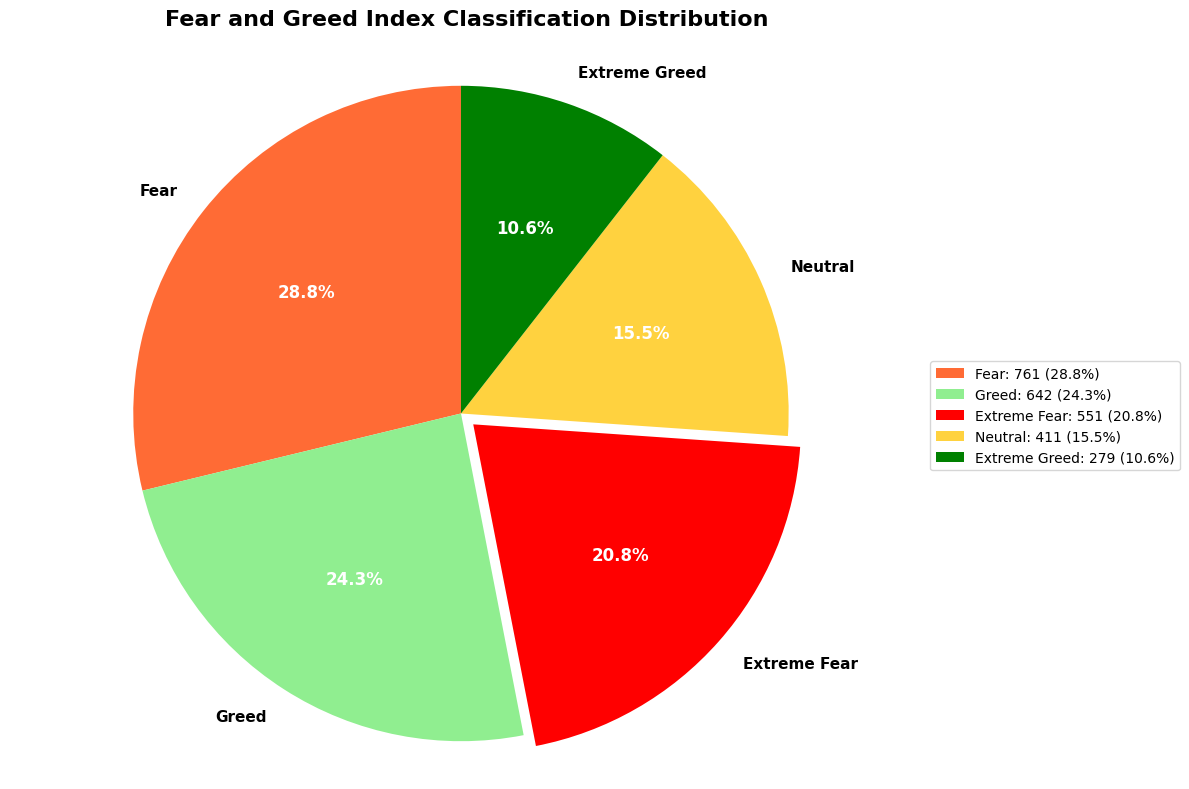


Fear and Greed Index Classification Summary:
Extreme Fear   :  551 records ( 20.8%)
Fear           :  761 records ( 28.8%)
Neutral        :  411 records ( 15.5%)
Greed          :  642 records ( 24.3%)
Extreme Greed  :  279 records ( 10.6%)

Total data points: 2644
Most common sentiment: Fear (761 records)
Least common sentiment: Extreme Greed (279 records)


In [ ]:
# Create a pie chart for Fear and Greed Index classification
plt.figure(figsize=(12, 8))


classification_counts = df['classification'].value_counts()


colors = {
    'Extreme Fear': '#FF0000',   
    'Fear': '#FF6B35',            
    'Neutral': '#FFD23F',       
    'Greed': '#90EE90',           
    'Extreme Greed': '#008000'    
}

pie_colors = [colors[cat] for cat in classification_counts.index]

# Create the pie chart
wedges, texts, autotexts = plt.pie(classification_counts.values, 
                                   labels=classification_counts.index,
                                   colors=pie_colors,
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   explode=[0.05 if cat == 'Extreme Fear' else 0 for cat in classification_counts.index])


plt.title('Fear and Greed Index Classification Distribution', 
          fontsize=16, fontweight='bold', pad=20)


for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')


for text in texts:
    text.set_fontsize(11)
    text.set_fontweight('bold')


legend_labels = []
for classification in classification_counts.index:
    count = classification_counts[classification]
    percentage = (count / len(df)) * 100
    legend_labels.append(f'{classification}: {count} ({percentage:.1f}%)')

plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.axis('equal')  
plt.tight_layout()
plt.show()


print("\nFear and Greed Index Classification Summary:")
print("=" * 50)
total = len(df)
for classification in ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']:
    count = classification_counts.get(classification, 0)
    percentage = (count / total) * 100
    print(f"{classification:<15}: {count:>4} records ({percentage:>5.1f}%)")

print(f"\nTotal data points: {total}")
print(f"Most common sentiment: {classification_counts.index[0]} ({classification_counts.iloc[0]} records)")
print(f"Least common sentiment: {classification_counts.index[-1]} ({classification_counts.iloc[-1]} records)")

# Export data

In [17]:
# Export data
df.to_csv(r'F:\PROGRAMMING\MY PROJECTS\ALL_PROJECTS\Data_Science_Internshala\ds_Lucky_Sharma\outputs\bitcoin_market_sentiment.csv', index=False)
print ("Data Export Successfully")

Data Export Successfully


# By: Lucky Sharma